In [1]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

R_scan = pd.read_csv('./spectrum/LENS/rev2/R_5_B.csv')['SCAN'].values
wl = np.linspace(400, 700, 301)

air = ml.Non_Dispersion(1)
ITO_L = ml.open_material('ITO_LENS', 'Sellmeier')
OC = ml.open_material('OC_HRI_LENS', 'Material')
sodalime_LENS = ml.Non_Dispersion(1.52)

ITO = ml.Cauchy([1.640727, 0.050604], ITO_L.k, ITO_L.wl_k)
SiN = ml.Cauchy([1.97812451, 0.0100578])
SiO2 = ml.Cauchy([1.50818418, 0.00141496727])

R_hypo = lambda th: tm.Design(
    [air, SiN, SiO2, OC, ITO, SiO2, SiN, sodalime_LENS],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl, 5)

def RMSE(hypo, target,n):
    return (sum((hypo-target)**2)/n)**.5

fom = lambda th: tm.RMSE(100*R_hypo(th), R_scan)

In [17]:
sol = differential_evolution(
    fom, [
        (5,80),(4,200),(2100,2500),(20,50),(4,100),(5,80)
    ], disp=True, polish=False, popsize=15, mutation=0.3, recombination=0.9, strategy='best1bin'
)
print(sol.x)

differential_evolution step 1: f(x)= 3.32816
differential_evolution step 2: f(x)= 3.02567
differential_evolution step 3: f(x)= 2.96632
differential_evolution step 4: f(x)= 2.86447
differential_evolution step 5: f(x)= 2.84171
differential_evolution step 6: f(x)= 2.8405
differential_evolution step 7: f(x)= 2.84013
differential_evolution step 8: f(x)= 2.83938
differential_evolution step 9: f(x)= 2.83924
[  30.21042131   16.48244707 2369.81594669   20.01062339   53.85453425
   10.61937785]


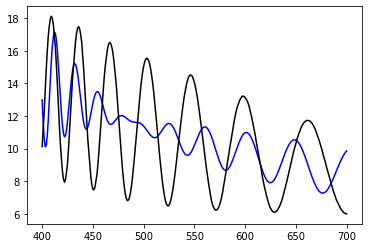

In [18]:
f1 = [13.91047239,21.90481726,1837.3297089,28.29424777,36.09996534,7.87661007]
f2 = [0,0,2400,0,0,0]
tk = sol.x
plt.plot(wl, 100*R_hypo(tk), '-b')
plt.plot(wl, R_scan, '-k')
plt.show()